# Exploraty Data Analysis

Exploraty Data Analysis (EDA) of our datasets about the Drupal Community.

# Installation

In [2]:
import datetime
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from drucom import Drupal

drupalClient = Drupal()

TypeError: 'module' object is not callable

In [ ]:
start = 0
end = 0


In [8]:
# Add formatted registration date.
if 'registered_on' not in df.columns:
    df['registered_on'] = df['created'].apply(lambda d: datetime.datetime.fromtimestamp(d))

# Ensure 'timezone' column contains only strings with no digits
if 'region' not in df.columns:
    df['region'] = df['timezone'].apply(lambda x: str(x.split('/')[0]) if isinstance(x, str) and x.isalpha() else None)
    pass

# Some cleaning.
for column in df.columns:
    if column.startswith((
        'created',
        'edit_url',
        'url',
        'og_',
        'feed',
        'field_terms_of_service',
        'field_user_comment_meta',
        'flag_sid',
        'language',
    )):
        df.drop(columns=[column], inplace=True)

# Display data types.
df.dtypes

field_areas_of_expertise                   object
field_bio                                  object
field_contributed                          object
field_contribution_role                    object
field_country                              object
field_da_ind_membership                    object
field_drupal_contributions                 object
field_events_attended                      object
field_first_name                           object
field_industries_worked_in                 object
field_languages                            object
field_last_name                            object
field_mentors                              object
field_organizations                        object
field_shared_account_for_an_org           float64
field_slack                                object
field_user_location                        object
field_user_primary_language                object
field_user_pronouns                        object
field_websites                             object


## Geographical distribution

Exploration of the distribution of the Drupal community on the planet.

In [14]:
df[df['region'].str.len() > 0]

,registered_on,field_areas_of_expertise,field_bio,field_contributed,field_contribution_role,field_country,field_da_ind_membership,field_drupal_contributions,field_events_attended,field_first_name,...,field_shared_account_for_an_org,field_slack,field_user_location,field_user_primary_language,field_user_pronouns,field_websites,name,timezone,uid,region


In [ ]:
# Get total number of users per region.
regions = {}
timezones = df[df['timezone'].str.len() > 1 & df['timezone'] ]['timezone'].unique()
timezones.sort()
for timezone in timezones:
    region = timezone.split('/')[0]
    if region not in regions:
        regions[region] = 0
    regions[region] += df[df['timezone'] == timezone].size

regions = sorted(regions.items(), key=lambda x: x[1], reverse=False)
regions = dict(regions)

<BarContainer object of 23 artists>

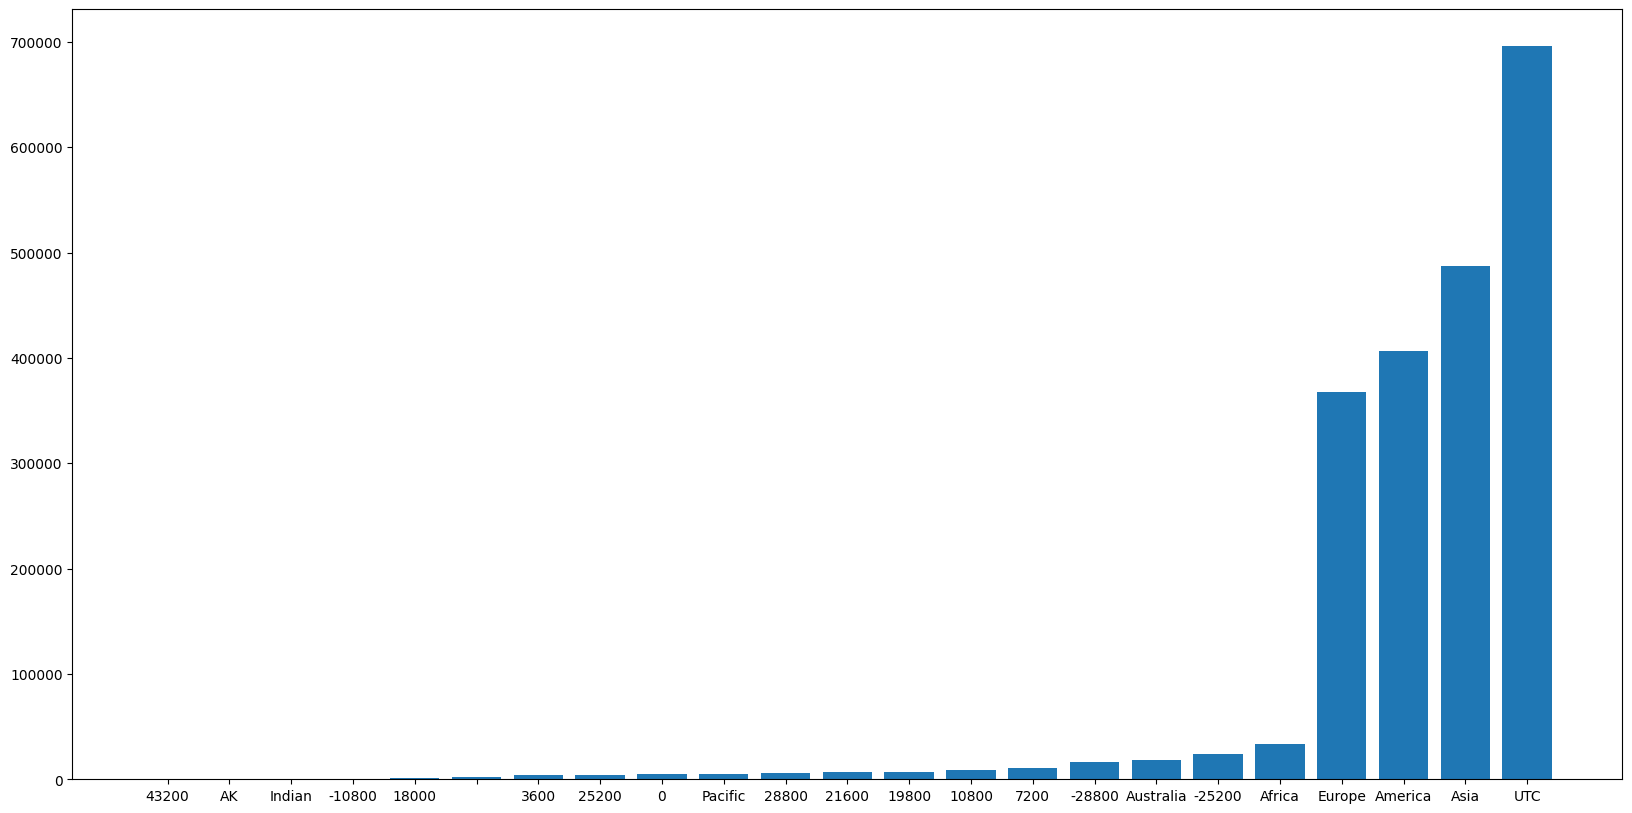

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(x=regions.keys(), height=regions.values(), )

In [ ]:
t = df[(~df['timezone'].isnull()) & (df['timezone'].str.len() > 1)]
x = t[t.timezone.str.startswith('3600')]
display(len(x), x.head())

166

,registered_on,field_areas_of_expertise,field_bio,field_contributed,field_contribution_role,field_country,field_da_ind_membership,field_drupal_contributions,field_events_attended,field_first_name,...,field_shared_account_for_an_org,field_slack,field_user_location,field_user_primary_language,field_user_pronouns,field_websites,name,timezone,uid,url
685,2014-08-02 23:13:06,[],[],[],[],[],None,[],[],None,...,NaN,NaN,None,None,None,[],brianO,3600,2979051,https://www.drupal.org/u/briano
908,2014-08-03 16:23:38,[],[],[],[],[],None,[],[],None,...,NaN,NaN,None,None,None,[],crowned,3600,2979549,https://www.drupal.org/u/crowned
1012,2014-08-04 00:43:22,[],[],[],[],[],None,[],[],None,...,NaN,NaN,None,None,None,[],1len1,36000,2979785,https://www.drupal.org/u/1len1
1727,2014-08-05 15:40:41,[],[],[],[],[],None,[],[],None,...,NaN,NaN,None,None,None,[],adesvaz,3600,2981353,https://www.drupal.org/u/adesvaz
2083,2014-08-06 09:22:35,[],[],[],[],[],None,[],[],None,...,NaN,NaN,None,None,None,[],KOGBEREGBE,3600,2982141,https://www.drupal.org/u/kogberegbe


In [ ]:
#df.to_csv("users_data.csv", index=False)

## Expertises

Analyze **expertises** of the users community.

* Are certain professional sectors over-represented?
* Are there regions of the world where certain areas of expertise are favored?

In [ ]:
# Group by `field_industries_worked_in` and histplot user counts
# Segment by `field_country` 

## Mentors and mentees

Exploration of the mentorship within the Drupal community.

In [ ]:
mentees = df[~df['field_mentors'].isnull()]
len(mentees)

5000

<BarContainer object of 5 artists>

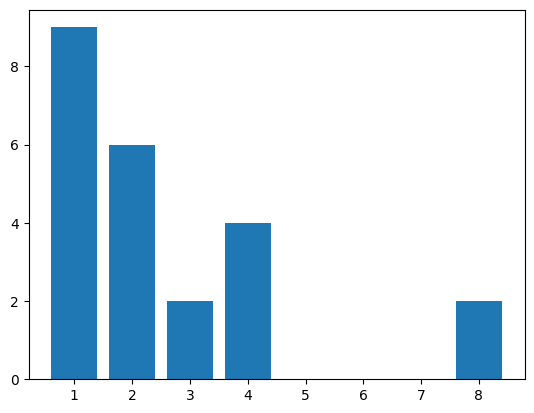

In [ ]:
mentees['field_mentors'] = mentees['field_mentors'].apply(lambda x: len(x))
mentees = mentees[mentees['field_mentors'] > 0]
mentees = mentees.groupby('field_mentors').size()
mentees = mentees.sort_index()
plt.bar(x=mentees.index, height=mentees.values) 